# Creating subplots with matplotlib and cartopy

This notebook provides an introduction and guidance on working with subplots using matplotlib and cartopy.

General references:
 - https://matplotlib.org/tutorials/index.html
 - https://matplotlib.org/gallery/index.html
 - https://scitools.org.uk/cartopy/docs/latest/

## Plotting with matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here we generate sample data using `linspace`: 100 sample points between 0 and 4$\pi$. We plot the data through the simple interface of matplotlib that was originally designed to emulate the behaviour of Matlab.

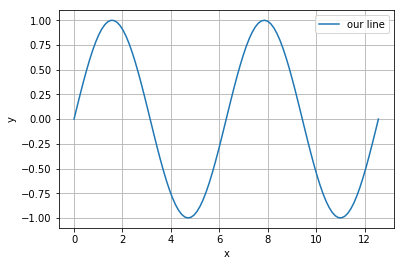

In [2]:
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)
plt.plot(x, y, label="our line")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend();

We have adjusted our figure using functions contained within `matplotlib.pyplot`. We might continue this workflow by creating subplots.

References:
 - https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html
 - https://matplotlib.org/tutorials/introductory/pyplot.html

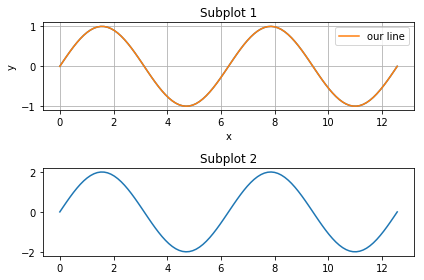

In [3]:
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.plot(x, y, label="our line")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.title("Subplot 1")

plt.subplot(2, 1, 2)
plt.plot(x, 2*y)
plt.title("Subplot 2");
plt.tight_layout()

(Use [`tight_layout()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.tight_layout.html) or [`subplots_adjust()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) to control the spacing between subplots.)

From here you could add more lines to change the style of the second subplot.... The trouble is that this approach isn't very flexible and not very clear - we only *know* that we are changing properties of the second subplot, rather than the first, because we can see that `plt.subplot(2, 1, 2)` preceeds these lines.

---
## --- Intro OOP here ---

---
## Creating and manipulating subplots using `.subplots()`

There are a number of ways to start making figures with matplotlib:

Here we use `plt.subplots()` to create a figure with subplots. This is generally the recommended way to create a figure but sometimes other routes may be better. There is some terminology used in matplotlib - "figure" refers to the whole figure being created, and "axes" refers to actual plots within a figure - it is customary to call these `fig` and `axes`, and `ax` when referring to individual axes. For more on this: https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure

`plt.subplots()` returns two objects, which we assign to `fig` and `axes`, and then we manipulate the figure and axes by calling methods of `fig` and `axes`

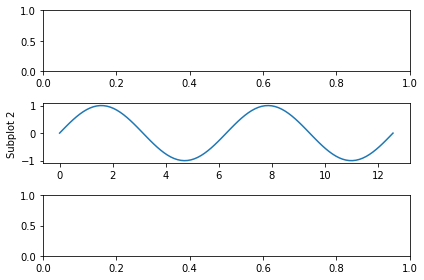

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=1)
axes[1].plot(x, y)
axes[1].set_ylabel("Subplot 2")
fig.tight_layout()

We have created a `Figure` object, `fig`, and an array of `AxesSubplot` objects within `axes`:

In [5]:
type(fig)

matplotlib.figure.Figure

In [6]:
type(axes)

numpy.ndarray

In [7]:
type(axes[0])

matplotlib.axes._subplots.AxesSubplot

We could directly unpack the array of `AxesSubplot` objects directly into their own variable names: (`ax0`, `ax1`, `ax2`):

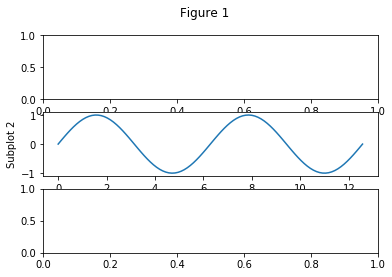

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1)
ax1.plot(x, y)
ax1.set_ylabel("Subplot 2")
fig.suptitle("Figure 1");

## Creating subplots within a loop

Here we use `sharex` and `sharey` so that all the x and y axes are tied together. Setting the limits on one will affect all of them, and unnecessary duplicate axes numbering is not done. We also use a common way of making a loop together with a loop counter, `i`, by using `enumerate(axes)` to create values of `i` and`ax` which will change on each iteration of the loop. (`i` counts the position of `ax` within `axes`, i.e. it will be an `int` `0`, `1`, or `2`)

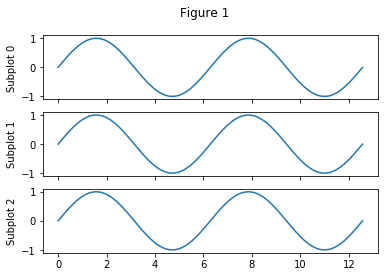

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
for i, ax in enumerate(axes):
    ax.plot(x, y)
    ax.set_ylabel(f"Subplot {i}")
fig.suptitle("Figure 1");

##### Exercise:
Write a function which has `ax` as an argument and generates some data and plots it onto `ax` (`def plot_stuff(ax): ...`). Use this function to replace the line `ax.plot(x, y)` above. Then, add an additional argument to your function which causes each subplot to be different by making the value of this argument change on each iteration in the loop.

---

The following demonstrates how powerful this approach can be to produce results in a compact way. Here we use another common way of looping over two lists simultaneously (`axes` and `colours`) using `zip`. We create two arrays of 100 random numbers between 0 and 1 (the default behaviour of [`numpy.random.random`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html#numpy.random.random)) and plot them, repeating this 9 times. We set the marker style to be circles (`"o"`) and set transparency with `alpha`. There are many additional behaviours of `.plot()` to be explored: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

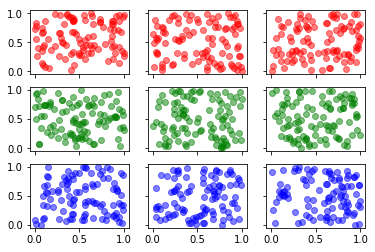

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
colours = ["r", "g", "b"]
for row, color in zip(axes, colours):
    for ax in row:
        x, y = np.random.random((2, 100))
        ax.plot(x, y, "o", alpha=0.5, color=color)

To get an idea about what is possible with matplotlib, the gallery is a good place to start: https://matplotlib.org/gallery/index.html

Beyond that there are many recipes that can be found online, particularly on Stack Overflow.

Several other libraries (e.g. pandas & cartopy) build on top of matplotlib so it is useful to be familiar with it.

## Creating a figure with cartopy

We can import *coordinate reference systems* (crs) from cartopy and pass them to matplotlib when we create a plot using the `projection` kwarg.

The axis created is now a cartopy object `cartopy.mpl.geoaxes.GeoAxesSubplot` which has behaviours from both matplotlib and cartopy. A method from cartopy is `.stock_img()`

References:
- https://scitools.org.uk/cartopy/docs/latest/gallery/
- https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

Below we use `fig.add_subplot()` to create subplots instead of creating them directly using `plt.subplots()` as above. This enables us to specify the projection when we create the subplot.

cartopy.mpl.geoaxes.GeoAxesSubplot

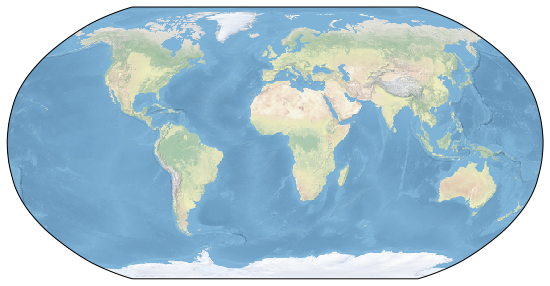

In [11]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.stock_img()
type(ax)

We can also use methods from matplotlib like `.scatter()` to create a scatter plot. Here we also need to tell it the projection that our input data is using (this will normally be Plate Carree, if we have data given in latitude and longitude). When we use cartopy, we must explicitly state the projection of the map we want to create, and that of the data to be plotted.

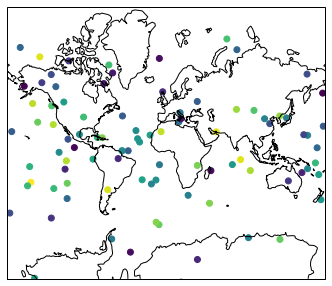

In [12]:
lats = 90 - 180*np.random.random((1, 100))
lons = 360*np.random.random((1, 100))
var = np.random.random((1, 100))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.scatter(lons, lats, c=var, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()

In these cartopy examples we have first created the `fig` object then created axes objects with `.add_subplot()`. This is necessary when we need to set the projection of the axes when we create it. Using `plt.subplots()` is a kind of short cut - it is still possible to use but is limited to the case when all axes share the same projection (I think).

Below we use `plt.subplots()` together with a kwarg, `subplot_kw`, which may be starting to look a bit magical - it is using a dictionary to provide the kwargs that each `.add_subplot()` call would need

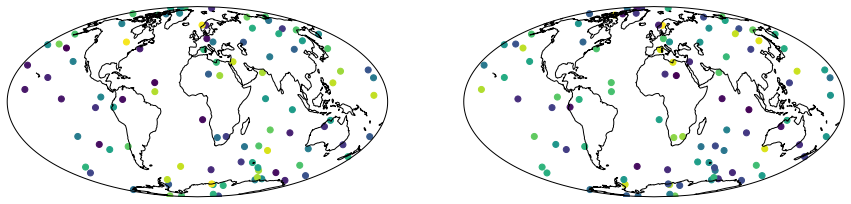

In [13]:
lats = 90 - 180*np.random.random((1, 100))
lons = 360*np.random.random((1, 100))
var1 = np.random.random((1, 100))
var2 = np.random.random((1, 100))

fig, axes = plt.subplots(ncols=2, figsize=(15, 5), subplot_kw={"projection": ccrs.Mollweide()})
for ax, var in zip(axes, (var1, var2)):
    ax.scatter(lons, lats, c=var, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_global()

##### Exercise

Create a figure with two (or more!) subplots with different projections of your choice. Generate some random data and visualise it using `.plot()`, `.scatter()` or one of the more advanced plotting methods (e.g. [`.quiver()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.quiver.html) [`.contourf()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.contourf.html) ...) You might find the cartopy gallery helpful: https://scitools.org.uk/cartopy/docs/latest/gallery/index.html